In [1]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(640, 640)

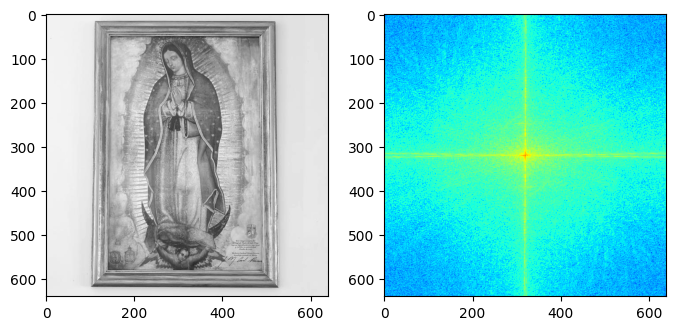

In [8]:
img = cv.imread('Guadalupana.jpg', cv.IMREAD_GRAYSCALE)
img_tf = np.fft.fft2(img)

fig, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(img, cmap = 'gray')
#Para visualizar la imagen tf, se aplica logaritmo y valores absolutos
ax[1].imshow(20*np.log(np.abs(np.fft.fftshift(img_tf))), cmap='jet')
img.shape

In [10]:
#Se genera la funcion de fitro gaussiano tamaño hxw
def create_gauss_filter(h, w, k_size, sigma):
    space_kernel = np.zeros((h, w))
    kernel_g = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    kernel_matrix = kernel_g * kernel_g.T
    y_center = (h // 2) - round(k_size / 2)
    x_center = (w // 2) - round(k_size / 2)
    space_kernel[y_center:y_center+k_size, x_center:x_center+k_size] = kernel_matrix
    kernel_tf = np.fft.fft2(space_kernel)
    return space_kernel, kernel_tf

Text(0.5, 1.0, 'Kernel fft')

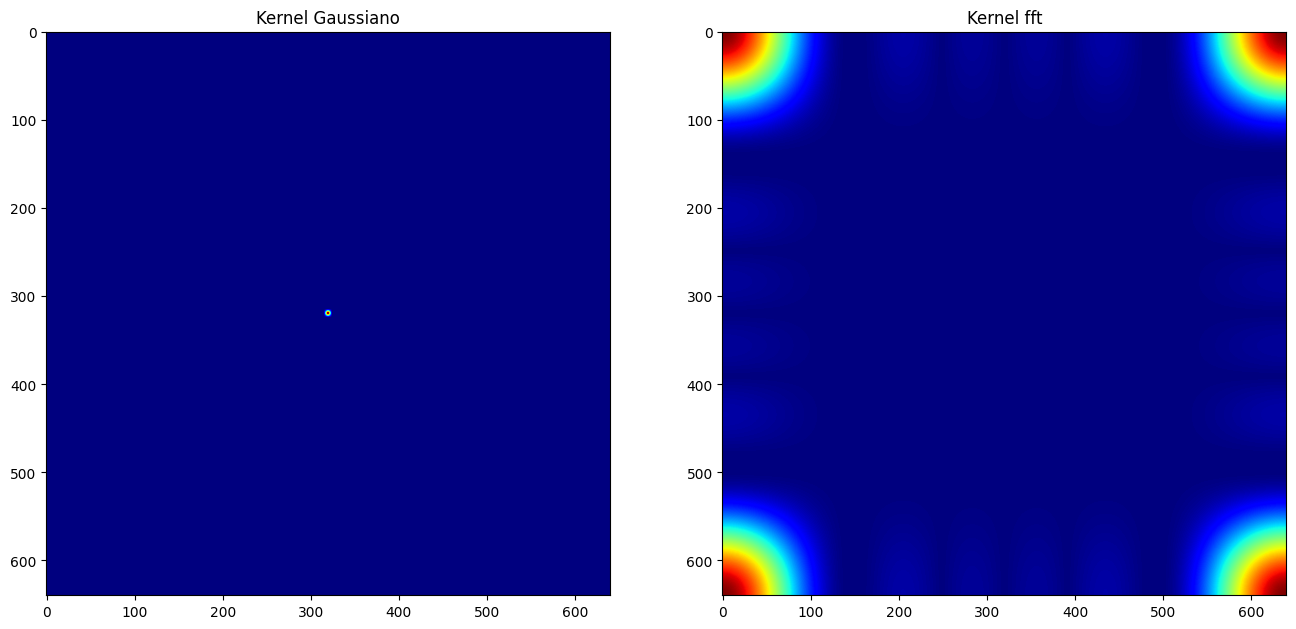

In [15]:
#Se aplica la función
kernel_1, kernel_tf_1 = create_gauss_filter(640, 640, k_size=8, sigma=2)

fig, ax = plt.subplots(1,2, figsize=(16,16))
ax[0].imshow(kernel_1, cmap='jet')
ax[0].set_title('Kernel Gaussiano')
ax[1].imshow(np.abs(kernel_tf_1), cmap='jet')
ax[1].set_title('Kernel fft')

Text(0.5, 1.0, 'Kernel fft')

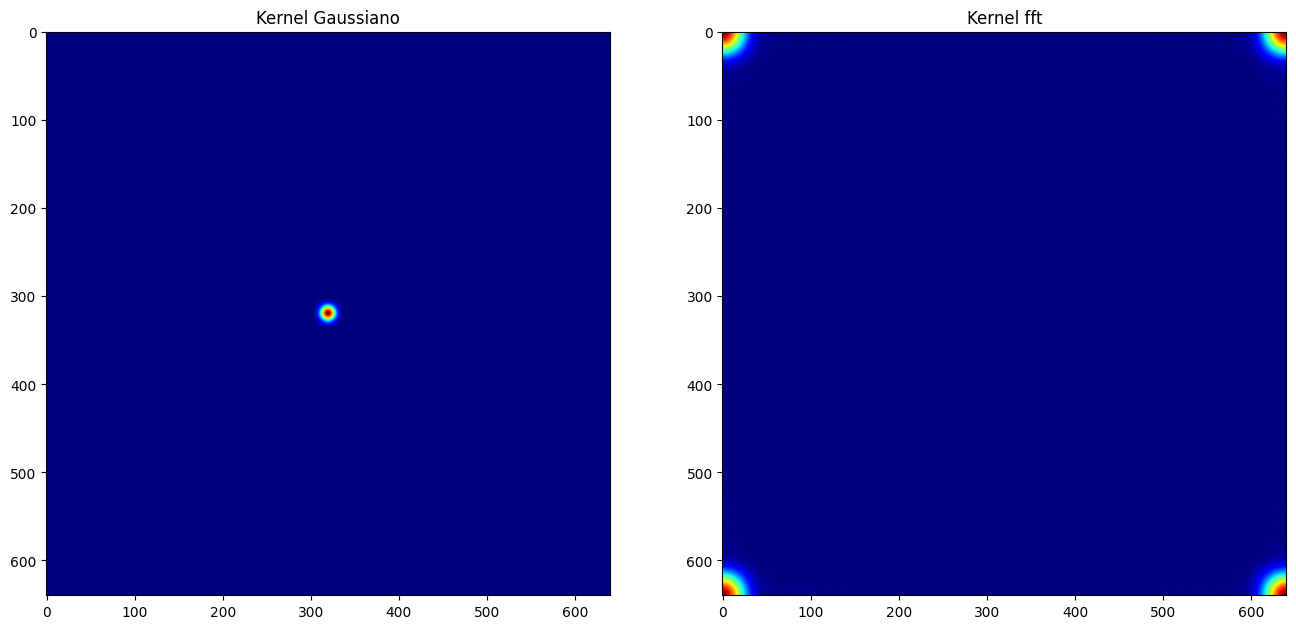

In [16]:
#Se aplica la función con otros valores de k_size y sigma
kernel_1, kernel_tf_1 = create_gauss_filter(640, 640, k_size=30, sigma=6)

fig, ax = plt.subplots(1,2, figsize=(16,16))
ax[0].imshow(kernel_1, cmap='jet')
ax[0].set_title('Kernel Gaussiano')
ax[1].imshow(np.abs(kernel_tf_1), cmap='jet')
ax[1].set_title('Kernel fft')

Text(0.5, 1.0, 'Desenfoque Gaussiano')

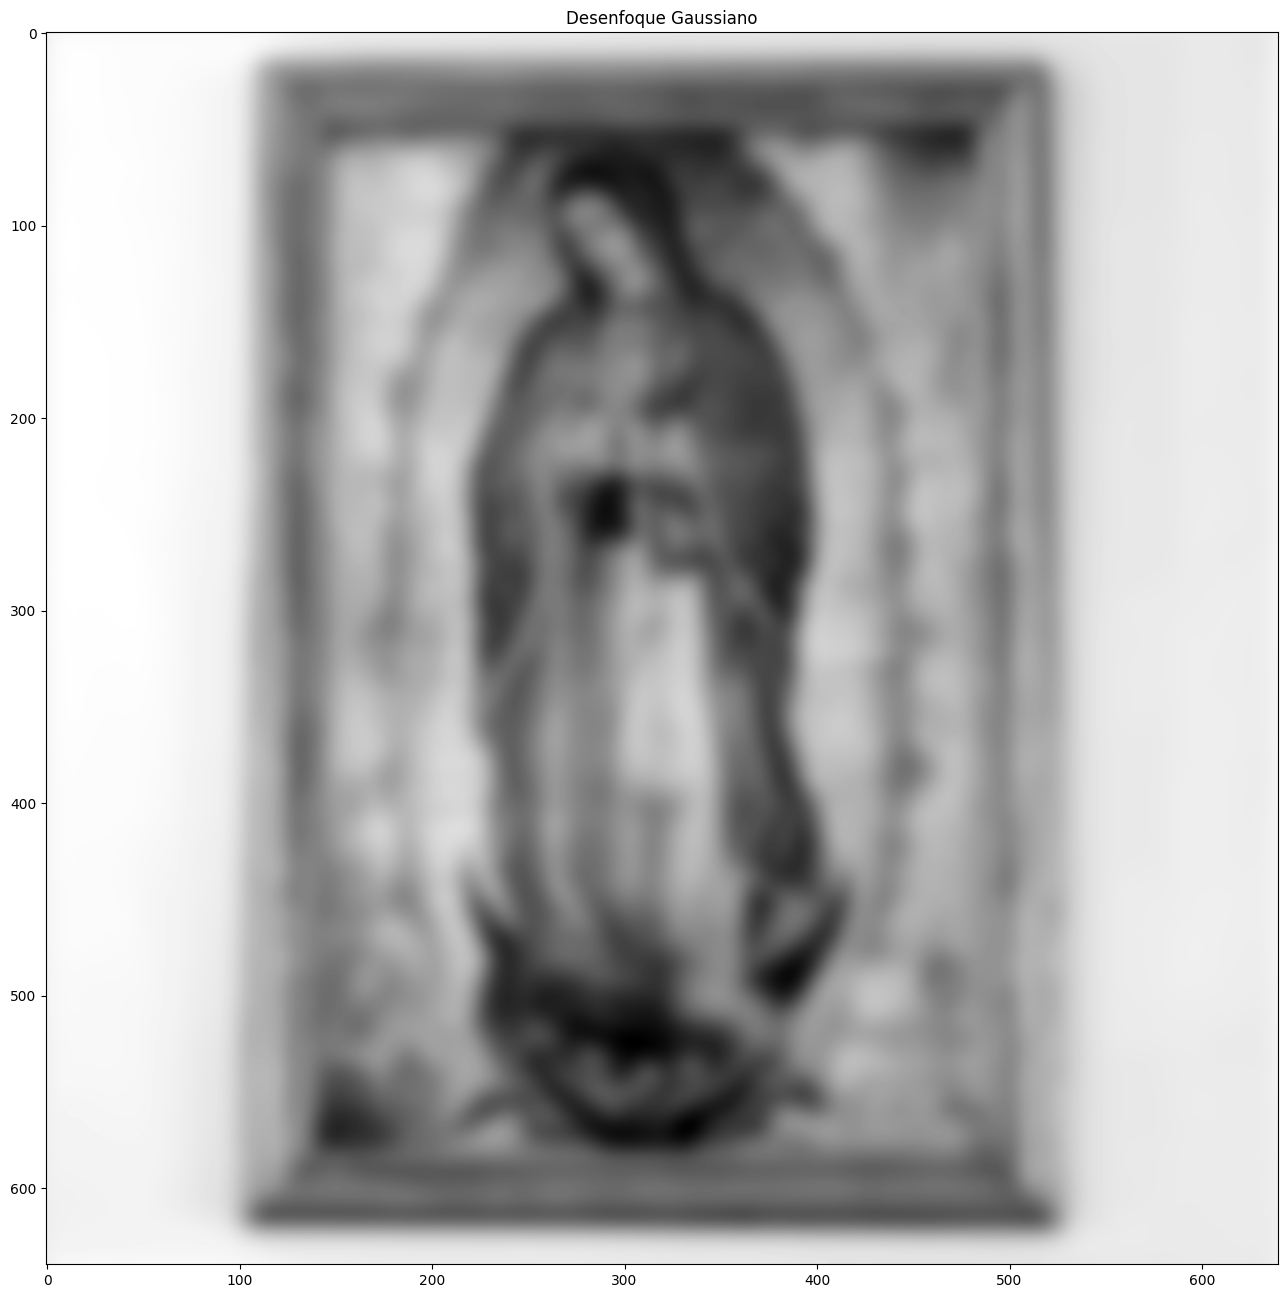

In [21]:
img_filtrada1 = img_tf * kernel_tf_1

img_gaussiana1 = np.fft.ifftshift(np.real(np.fft.ifft2(img_filtrada1)))
plt.figure(figsize=(16,16))
plt.imshow(img_gaussiana1, cmap='gray')
plt.title('Desenfoque Gaussiano')
